In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [23]:
df=pd.read_csv('housing.csv')
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [24]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [25]:
df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [27]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

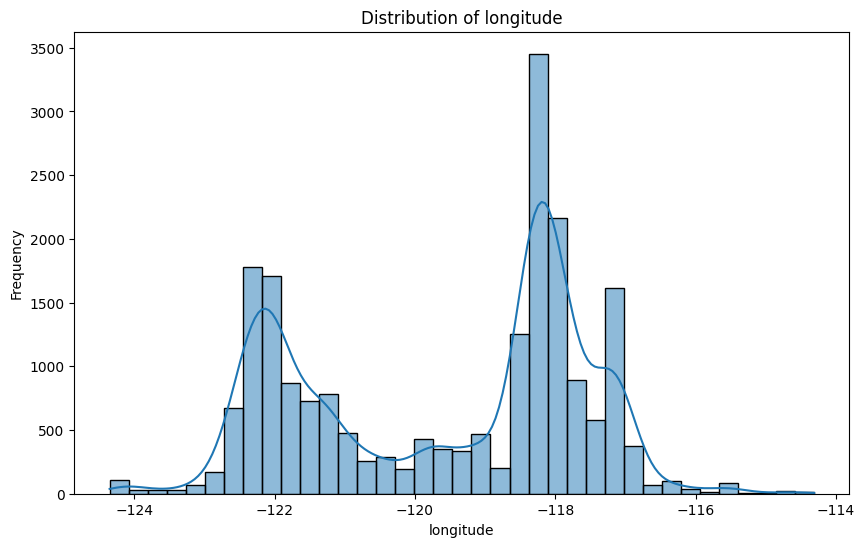

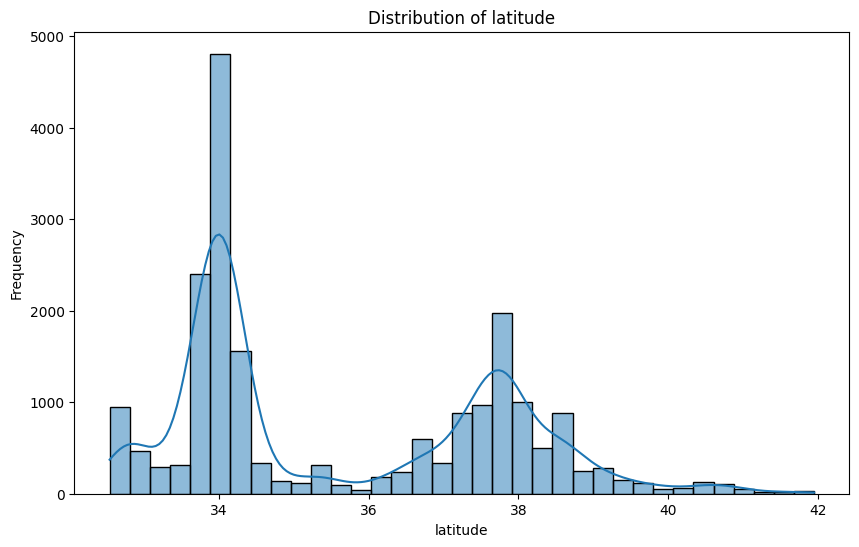

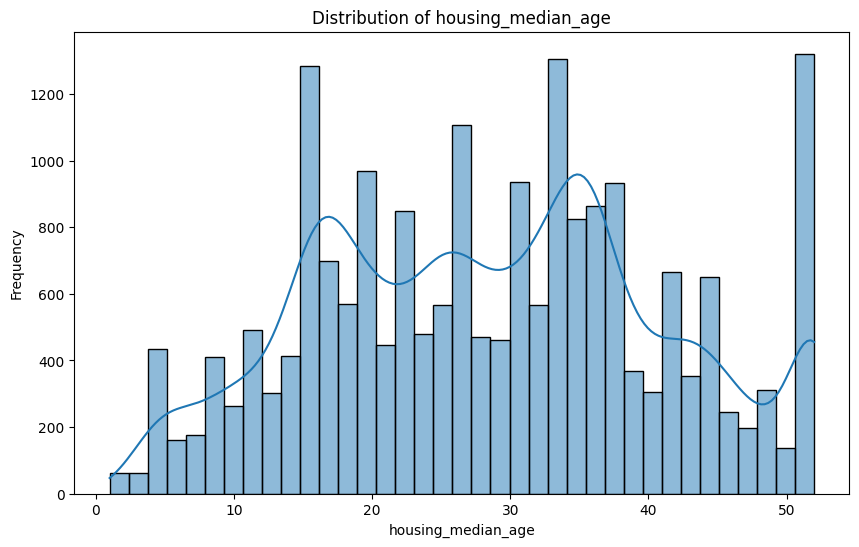

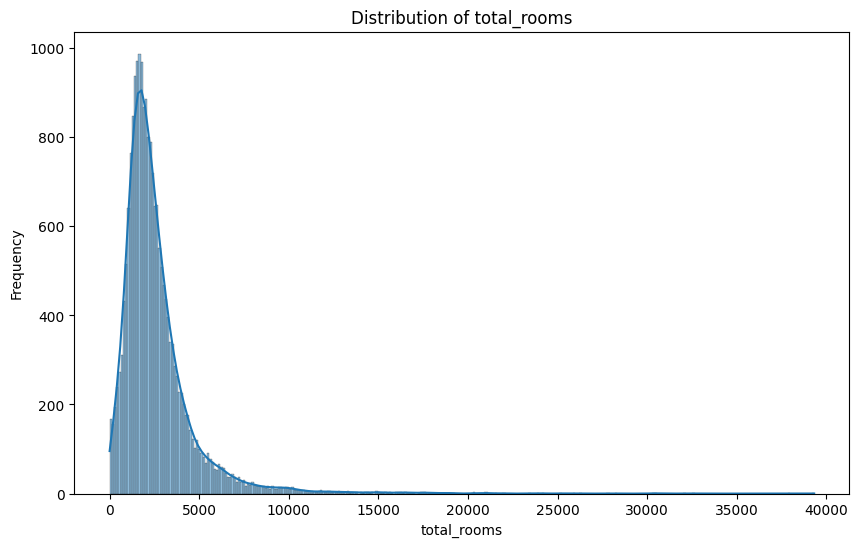

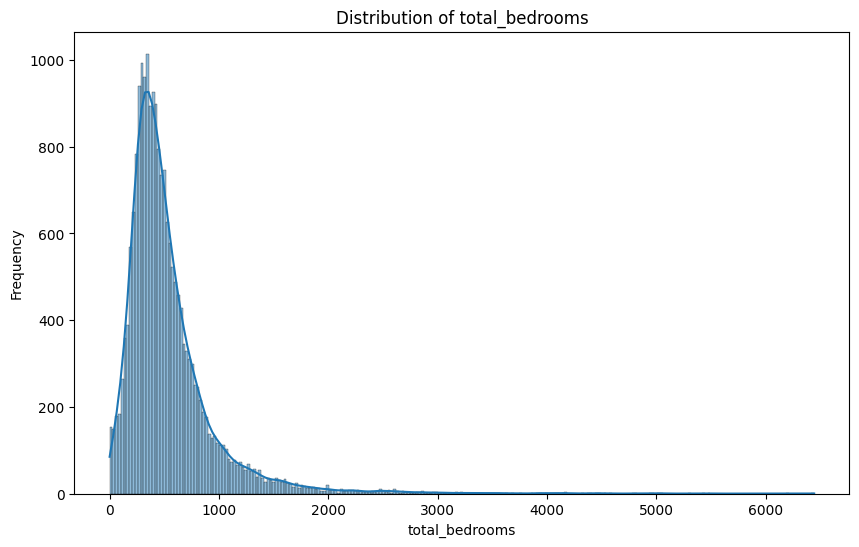

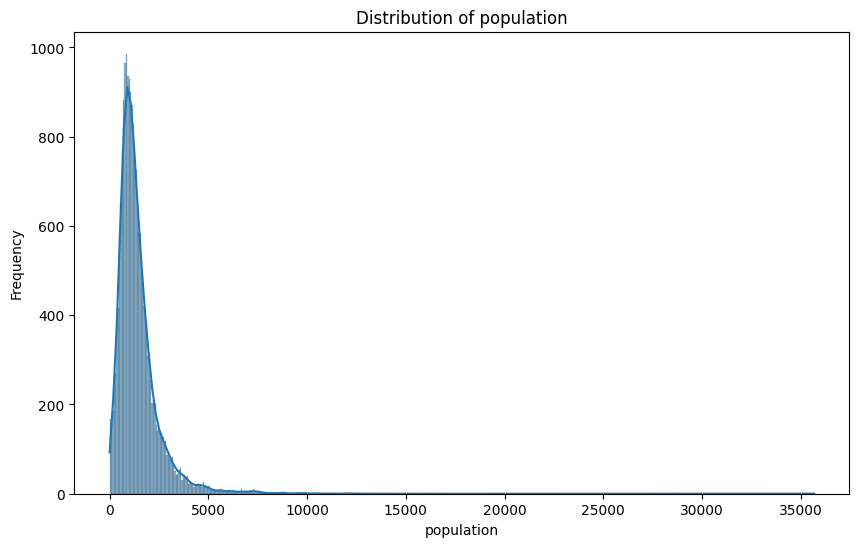

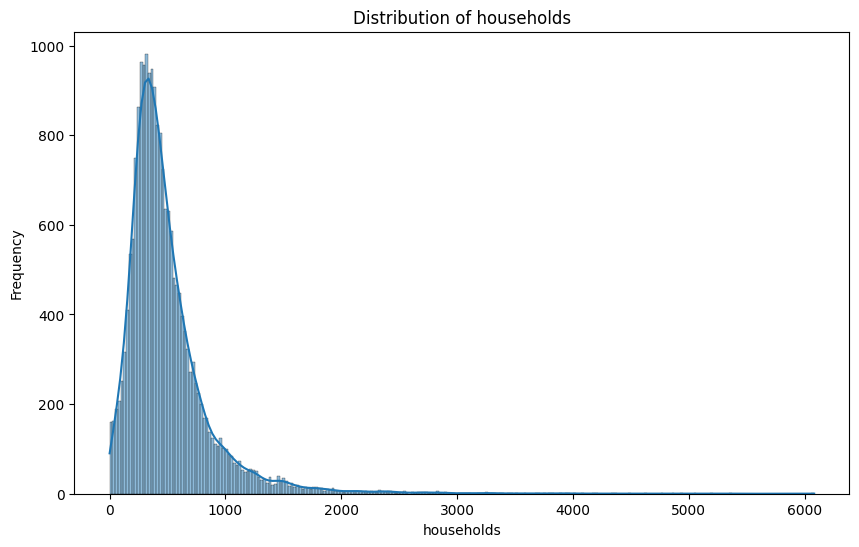

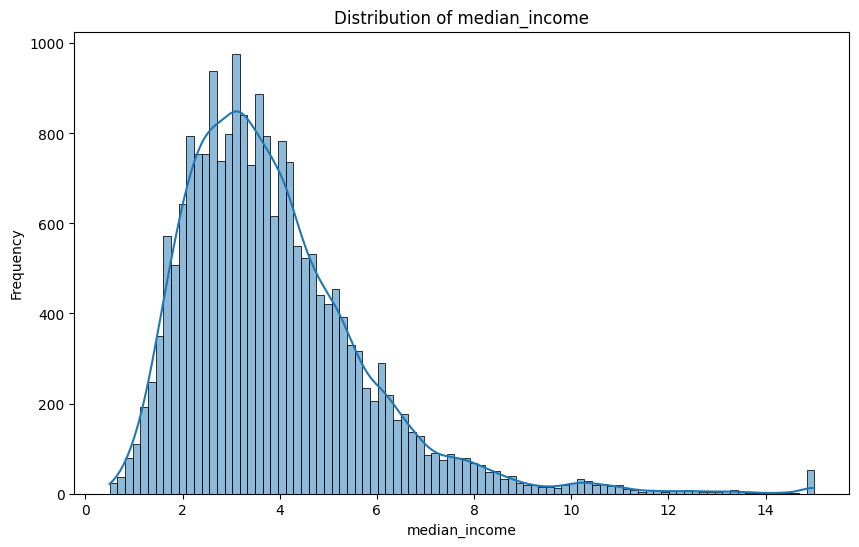

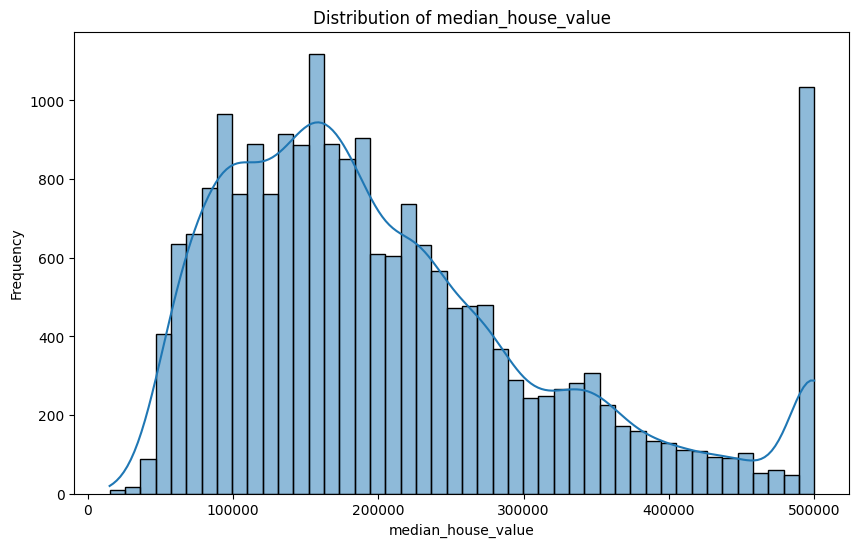

In [28]:
num_cols = df.select_dtypes(include=np.number).columns

for col in num_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()


In [29]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [30]:
df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].median())

In [31]:
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [32]:
# IQR = Q3 - Q1
# Lower Limit = Q1 - 1.5 * IQR
# Upper Limit = Q3 + 1.5 * IQR

cols = ['households', 'population', 'total_bedrooms', 'total_rooms']

for col in cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

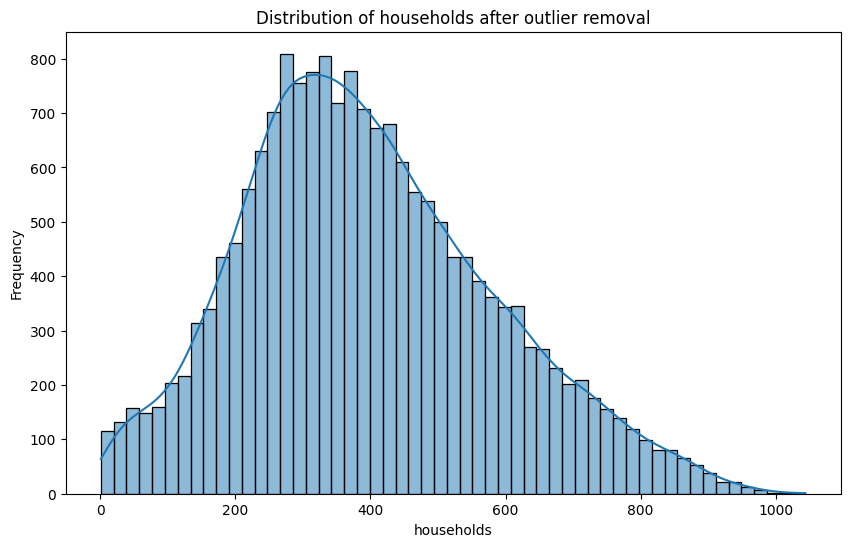

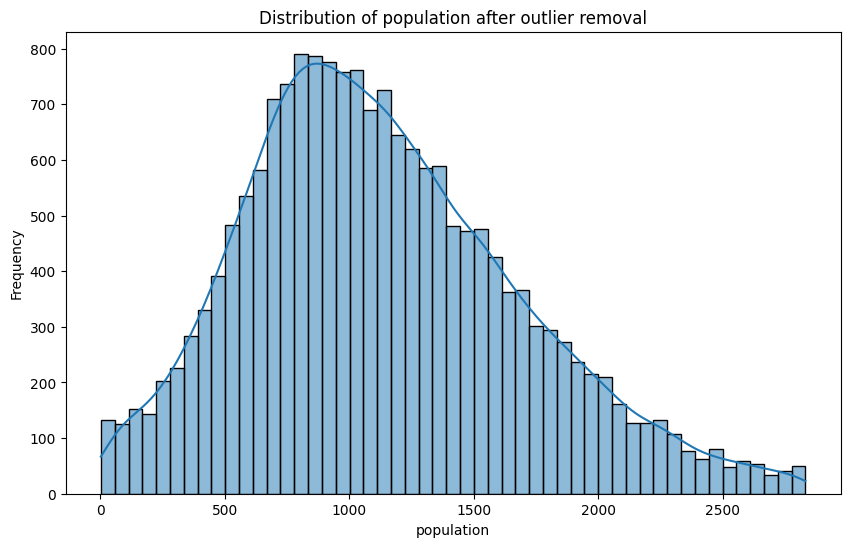

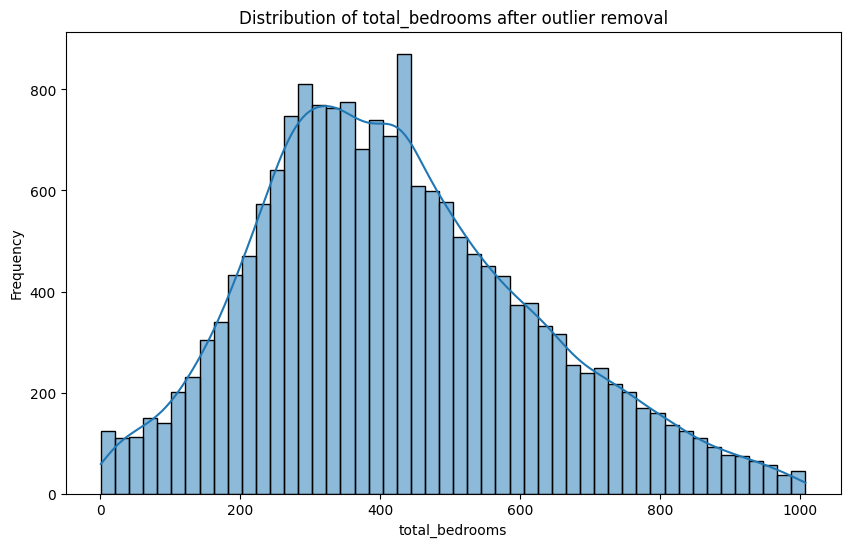

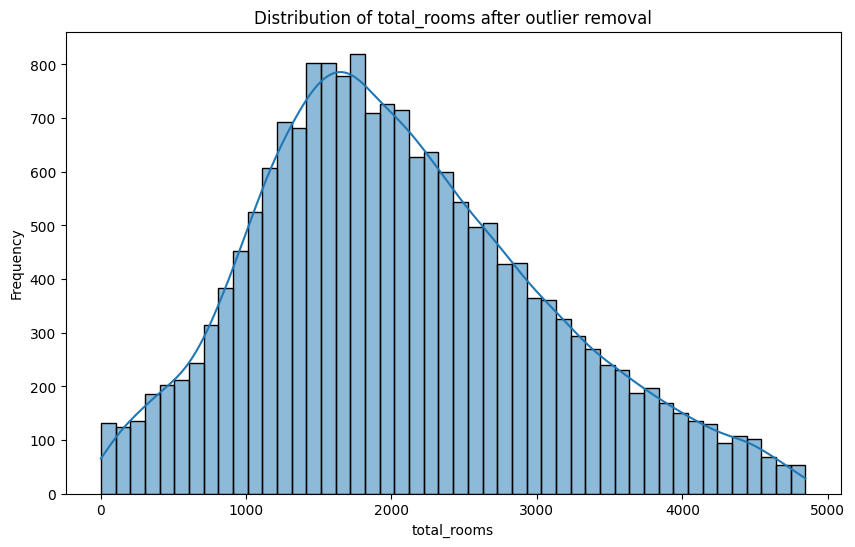

In [33]:

cols = ['households', 'population', 'total_bedrooms', 'total_rooms']

for col in cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col} after outlier removal')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [34]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   
5    -122.25     37.85                52.0        919.0           213.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
5       413.0       193.0         4.0368            269700.0        NEAR BAY

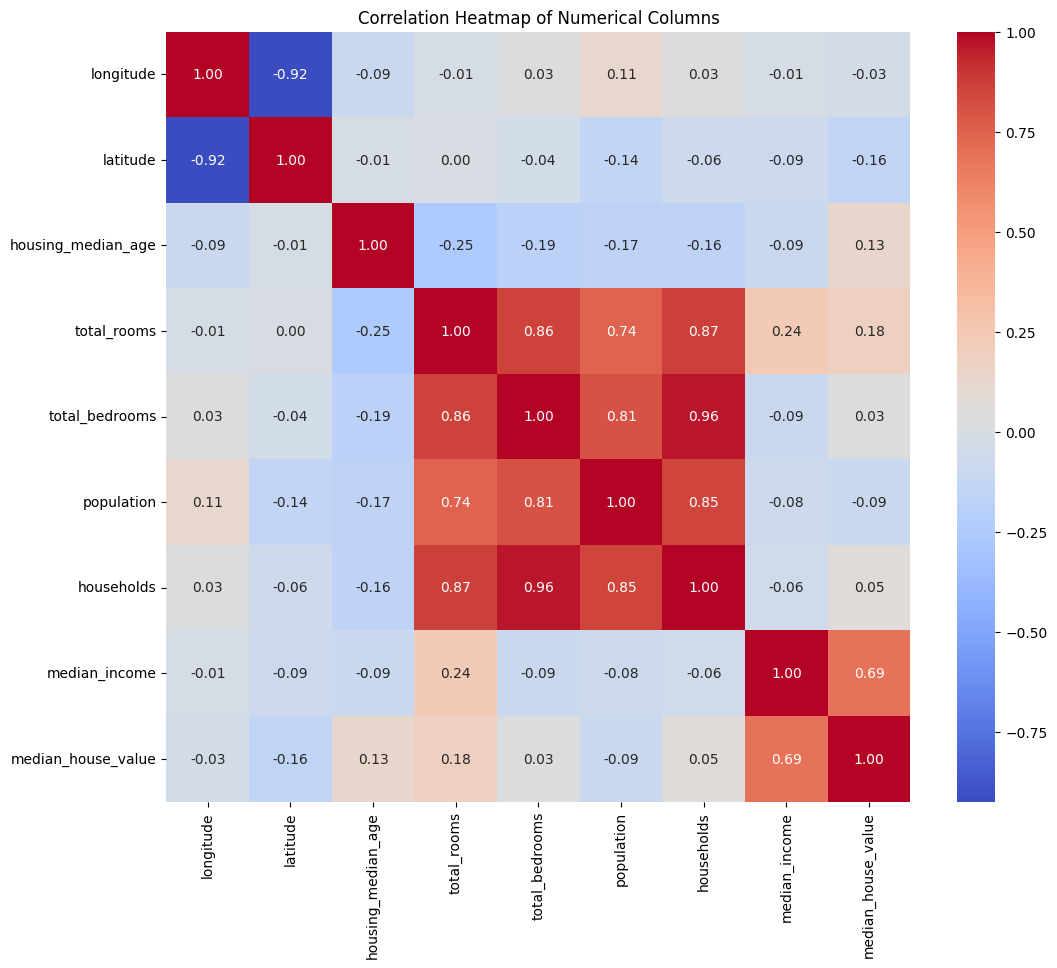

In [35]:
num_cols = df.select_dtypes(include=np.number).columns

# Heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()



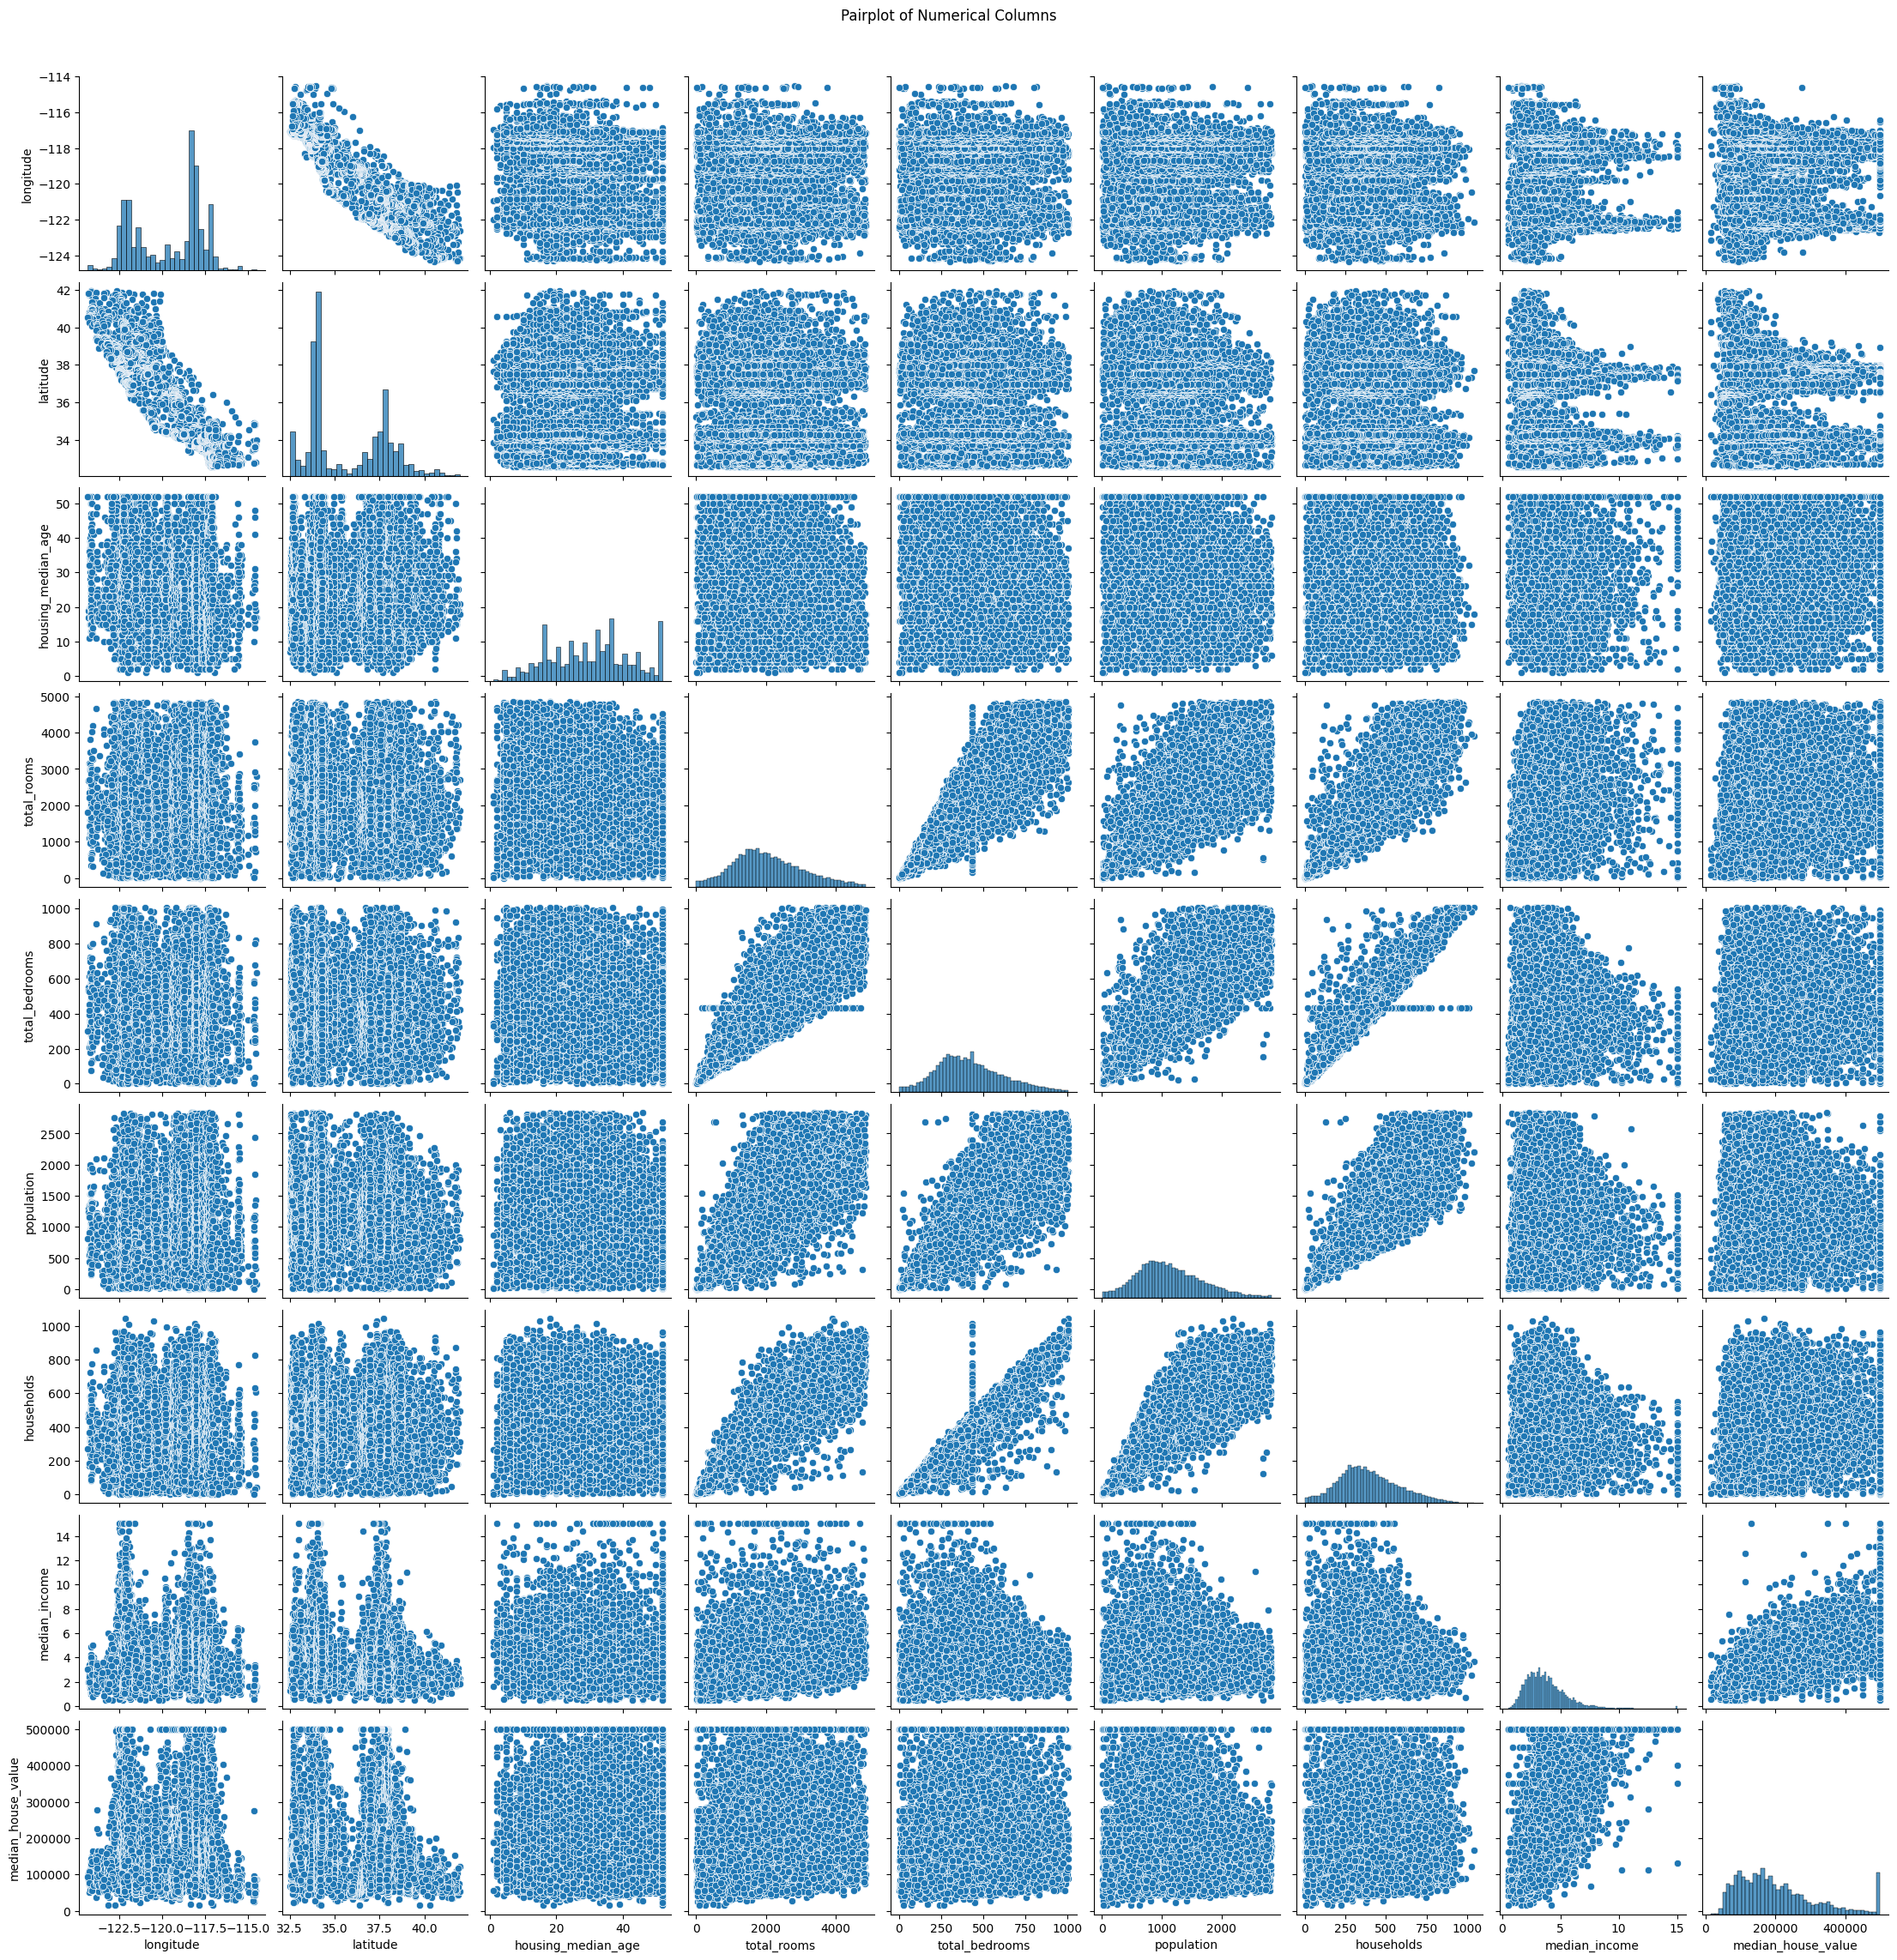

In [36]:
# Pairplot
sns.pairplot(df[num_cols])
plt.suptitle('Pairplot of Numerical Columns', y=1.02)
plt.show()

# Task
Create new features including 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household', and then apply one-hot encoding to the 'ocean_proximity' categorical variable in the dataframe.

## Create new features

### Subtask:
Generate new features such as 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' from existing numerical columns to potentially reduce multicollinearity and capture more meaningful relationships.


**Reasoning**:
Generate new features ('rooms_per_household', 'bedrooms_per_room', and 'population_per_household') by performing element-wise division on existing numerical columns in the DataFrame.



In [37]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']
print("New features 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' have been created.")

New features 'rooms_per_household', 'bedrooms_per_room', and 'population_per_household' have been created.


**Reasoning**:
The new features have been successfully created. The next step is to apply one-hot encoding to the 'ocean_proximity' categorical variable as per the main task.



In [38]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [39]:
df['ocean_proximity'] = df['ocean_proximity'].replace({
    '<1H OCEAN': '1H OCEAN'
})

In [40]:
df['ocean_proximity'].unique()

array(['NEAR BAY', '1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [41]:
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=False).astype(int)
print("One-hot encoding applied to 'ocean_proximity' column.")

One-hot encoding applied to 'ocean_proximity' column.


In [42]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        37                  41          880             129   
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   
5       -122        37                  52          919             213   

   population  households  median_income  median_house_value  \
0         322         126              8              452600   
2         496         177              7              352100   
3         558         219              5              341300   
4         565         259              3              342200   
5         413         193              4              269700   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0                    6                  0                         2   
2                    8                  0                         2   
3                    5                  0                         2   
4                    6                  0                         2   
5                    4                  0                         2   

   ocean_proximity_1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
5                         0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0  
5                         1                           0

## Summary:

### Data Analysis Key Findings

*   Three new features were successfully created: 'rooms\_per\_household' (calculated as `total_rooms / households`), 'bedrooms\_per\_room' (calculated as `total_bedrooms / total_rooms`), and 'population\_per\_household' (calculated as `population / households`).
*   One-hot encoding was applied to the 'ocean\_proximity' categorical variable, converting it into numerical features. Although part of the broader initial request, this step was not explicitly required by the instructions for this particular subtask.

### Insights or Next Steps

*   The creation of new ratio-based features like 'rooms\_per\_household' and 'population\_per\_household' can help in capturing more meaningful relationships and potentially reduce multicollinearity in the dataset, leading to improved model performance.
*   The one-hot encoding of 'ocean\_proximity' prepares the categorical data for machine learning models that require numerical inputs, but its premature application in this specific subtask context should be noted for future process refinement.


In [43]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        37                  41          880             129   
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   
5       -122        37                  52          919             213   

   population  households  median_income  median_house_value  \
0         322         126              8              452600   
2         496         177              7              352100   
3         558         219              5              341300   
4         565         259              3              342200   
5         413         193              4              269700   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0                    6                  0                         2   
2                    8                  0                         2   
3                    5                  0                         2   
4                    6                  0                         2   
5                    4                  0                         2   

   ocean_proximity_1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
5                         0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0  
5                         1                           0

In [44]:
X=df.drop('median_house_value',axis=1)
y=df['median_house_value']

In [45]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=32)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [47]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [48]:
y_pred=model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mean_absolute_error=mean_absolute_error(y_test,y_pred)
mean_squared_error=mean_squared_error(y_test,y_pred)
r2_score=r2_score(y_test,y_pred)

print("mean_absolute_error",mean_absolute_error)
print("mean_squared_error",mean_squared_error)
print("r2_score",r2_score)

mean_absolute_error 51173.787679420624
mean_squared_error 4903839372.871436
r2_score 0.6333334235509727


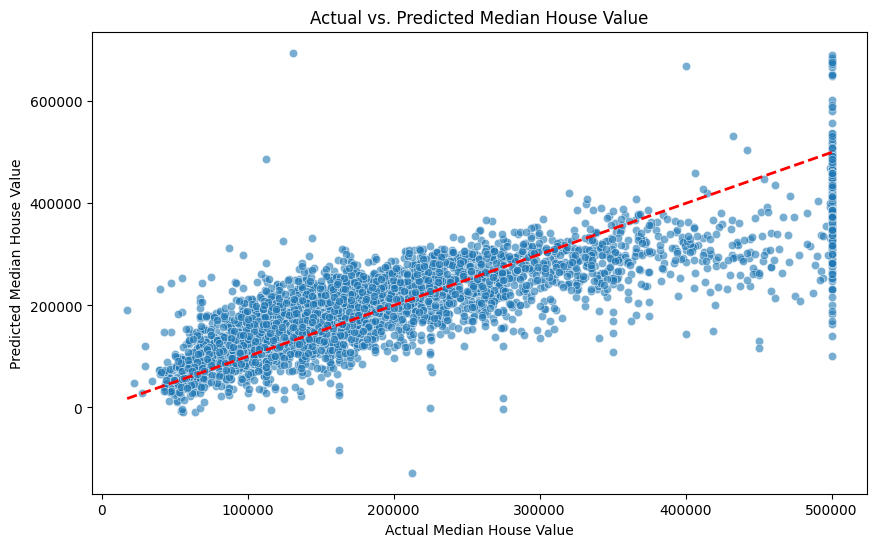

Evaluation Metrics:
Mean Absolute Error: 51173.787679420624
Mean Squared Error: 4903839372.871436
R-squared Score: 0.6333334235509727


In [50]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.show()

print("Evaluation Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error}")
print(f"Mean Squared Error: {mean_squared_error}")
print(f"R-squared Score: {r2_score}")

In [51]:
from sklearn.ensemble import RandomForestRegressor

model_rf = RandomForestRegressor(random_state=32)
model_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=32)

In [52]:
y_pred_rf = model_rf.predict(X_test)

In [53]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

mean_absolute_error_rf=mean_absolute_error(y_test,y_pred)
mean_squared_error_rf=mean_squared_error(y_test,y_pred)
r2_score_rf=r2_score(y_test,y_pred)

print("mean_absolute_error",mean_absolute_error_rf)
print("mean_squared_error",mean_squared_error_rf)
print("r2_score",r2_score_rf)

mean_absolute_error 51173.787679420624
mean_squared_error 4903839372.871436
r2_score 0.6333334235509727


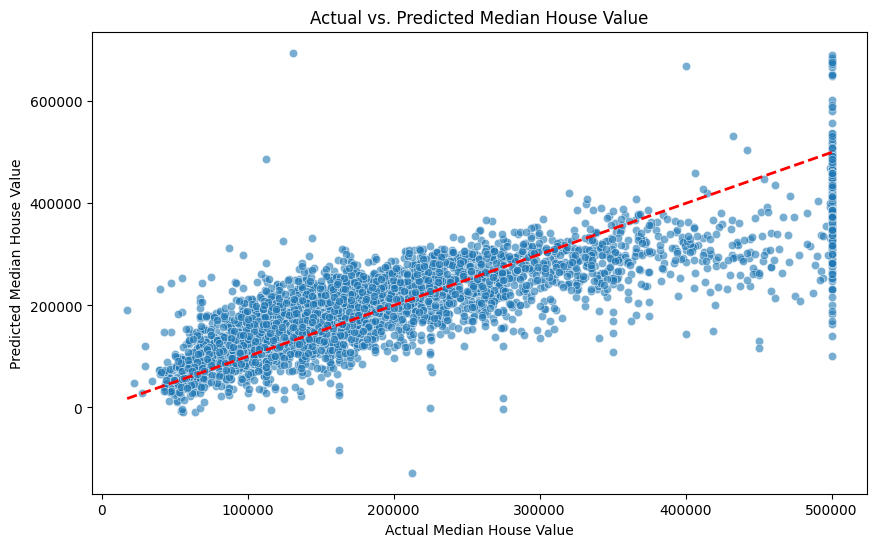

Evaluation Metrics:
Mean Absolute Error: 51173.787679420624
Mean Squared Error: 4903839372.871436
R-squared Score: 0.6333334235509727


In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value')
plt.show()

print("Evaluation Metrics:")
print(f"Mean Absolute Error: {mean_absolute_error_rf}")
print(f"Mean Squared Error: {mean_squared_error_rf}")
print(f"R-squared Score: {r2_score_rf}")

In [55]:
df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0       -122        37                  41          880             129   
2       -122        37                  52         1467             190   
3       -122        37                  52         1274             235   
4       -122        37                  52         1627             280   
5       -122        37                  52          919             213   

   population  households  median_income  median_house_value  \
0         322         126              8              452600   
2         496         177              7              352100   
3         558         219              5              341300   
4         565         259              3              342200   
5         413         193              4              269700   

   rooms_per_household  bedrooms_per_room  population_per_household  \
0                    6                  0                         2   
2                    8                  0                         2   
3                    5                  0                         2   
4                    6                  0                         2   
5                    4                  0                         2   

   ocean_proximity_1H OCEAN  ocean_proximity_INLAND  ocean_proximity_ISLAND  \
0                         0                       0                       0   
2                         0                       0                       0   
3                         0                       0                       0   
4                         0                       0                       0   
5                         0                       0                       0   

   ocean_proximity_NEAR BAY  ocean_proximity_NEAR OCEAN  
0                         1                           0  
2                         1                           0  
3                         1                           0  
4                         1                           0  
5                         1                           0

XGBoost Model Evaluation:
Mean Absolute Error: 39038.72265625
Mean Squared Error: 3192435456.0
R-squared Score: 0.7612974047660828


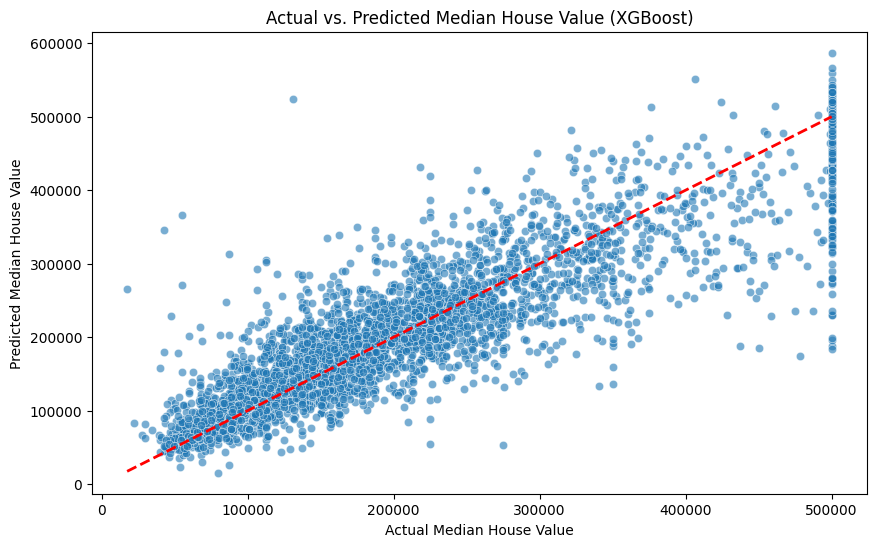

In [56]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Sanitize column names for XGBoost
X_train.columns = X_train.columns.str.replace('[<>]', '', regex=True)
X_test.columns = X_test.columns.str.replace('[<>]', '', regex=True)

# Initialize and train the XGBoost Regressor model
model_xgb = XGBRegressor(random_state=32)
model_xgb.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = model_xgb.predict(X_test)

# Evaluate the model
mean_absolute_error_xgb = mean_absolute_error(y_test, y_pred_xgb)
mean_squared_error_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_score_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost Model Evaluation:")
print(f"Mean Absolute Error: {mean_absolute_error_xgb}")
print(f"Mean Squared Error: {mean_squared_error_xgb}")
print(f"R-squared Score: {r2_score_xgb}")

# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_xgb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs. Predicted Median House Value (XGBoost)')
plt.show()

In [57]:
import pickle

# Save the trained XGBoost model to a file
model = 'xgboost_model.pkl'
pickle.dump(model_xgb, open(model, 'wb'))

print(f"XGBoost model successfully pickled and saved as {model}")

XGBoost model successfully pickled and saved as xgboost_model.pkl


In [58]:
import joblib
joblib.dump(X.columns.tolist(), "model_columns.pkl")

['model_columns.pkl']